# **Superstore Sales Analysis**

This project analyzes a retail superstore dataset to gain insights on sales performance, profits, discounts, product categories, and customer segments. 

**Objective:**   
- Identify top-performing products and categories  
- Analyze profit patterns and discount impact  
- Examine sales across regions and customer segments 

### Project setup and imports:


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
df=pd.read_csv("Superstore.csv")

In [46]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [48]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.000000
mean,64.000000,55536.795276,200.374864,3.858268,0.169055,-1.246387
std,36.805797,28525.179082,392.094120,2.263318,0.217586,166.588962
min,1.000000,10009.000000,1.248000,1.000000,0.000000,-1665.052200
25%,32.500000,28205.000000,19.380000,2.000000,0.000000,1.691500
50%,64.000000,55407.000000,64.624000,3.000000,0.200000,8.206200
75%,95.500000,82035.000000,195.952000,5.500000,0.200000,19.751500
max,127.000000,98103.000000,3083.430000,14.000000,0.800000,298.685500


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         127 non-null    int64  
 1   Order ID       127 non-null    object 
 2   Order Date     127 non-null    object 
 3   Ship Date      127 non-null    object 
 4   Ship Mode      127 non-null    object 
 5   Customer ID    127 non-null    object 
 6   Customer Name  127 non-null    object 
 7   Segment        127 non-null    object 
 8   Country        127 non-null    object 
 9   City           127 non-null    object 
 10  State          127 non-null    object 
 11  Postal Code    127 non-null    int64  
 12  Region         127 non-null    object 
 13  Product ID     127 non-null    object 
 14  Category       127 non-null    object 
 15  Sub-Category   127 non-null    object 
 16  Product Name   127 non-null    object 
 17  Sales          127 non-null    float64
 18  Quantity  

### Data cleaning

In [52]:
print(df.duplicated().sum())
df=df.drop(['Row ID','Order ID','Customer Name','Product ID','Postal Code','Country','City','State','Ship Date','Ship Mode','Customer ID'],axis=1)

0


In [54]:
df.head()

,Order Date,Segment,Region,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2017-11-08,Consumer,South,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2017-11-08,Consumer,South,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,2017-06-12,Corporate,West,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,2016-10-11,Consumer,South,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,2016-10-11,Consumer,South,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Top-performing products

In [73]:
top_product=df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(5)
top_product.index = top_product.index.str[:15]

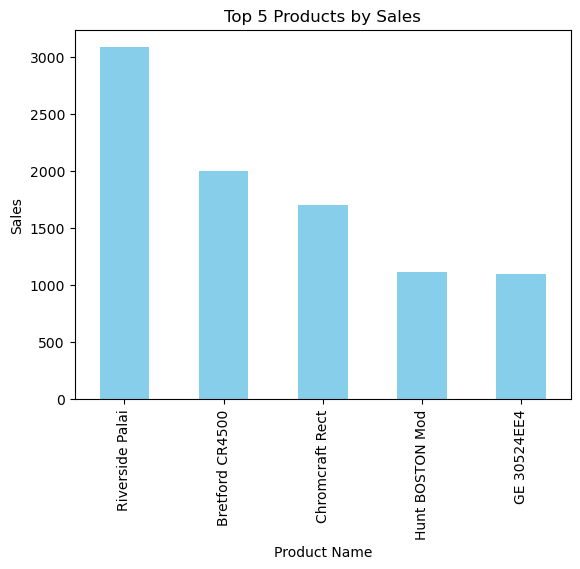

In [75]:
top_product.plot(kind='bar', color='skyblue', title='Top 5 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Sales')
plt.show()

### Sales by Category

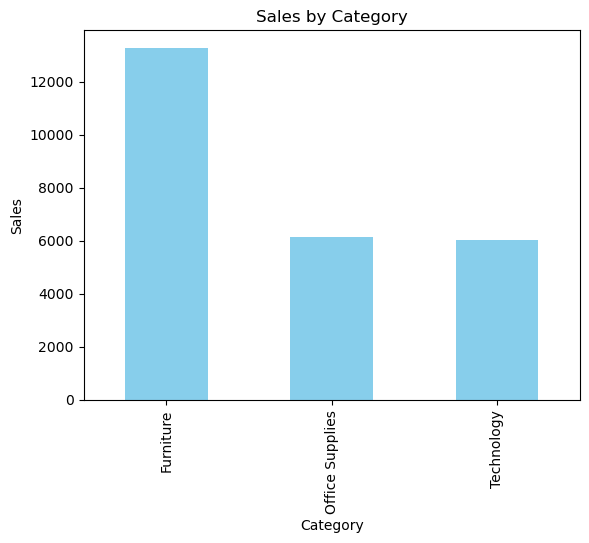

In [91]:
category_sales=df.groupby('Category')['Sales'].sum()

category_sales.plot(kind='bar',color='skyblue',title='Sales by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

### Profit Patterns and Discount Impact

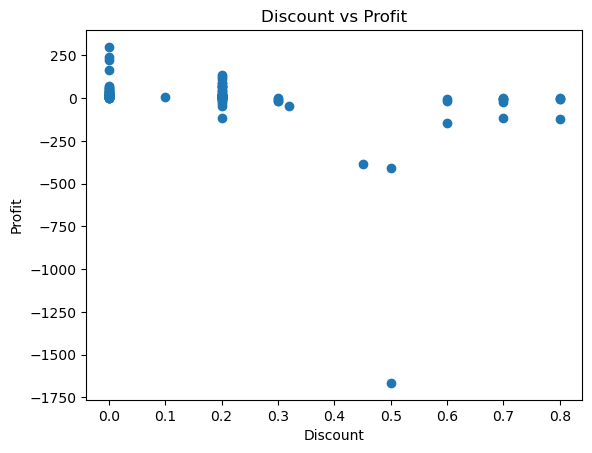

In [93]:
plt.scatter(df['Discount'], df['Profit'])
plt.title('Discount vs Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.show()

### Sales by Region

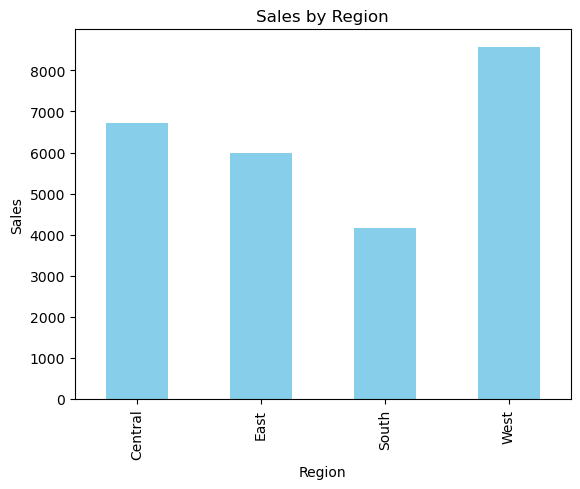

In [114]:
region_sales = df.groupby('Region')['Sales'].sum()

region_sales.plot(kind='bar', color='skyblue', title='Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

### Sales by Customer Segment

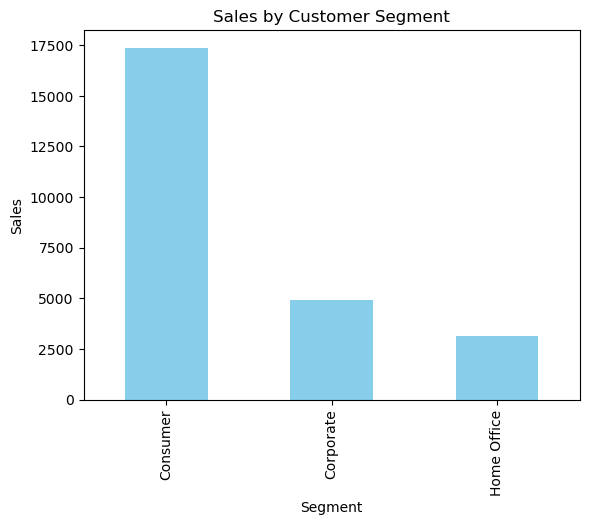

In [120]:
segment_sales = df.groupby('Segment')['Sales'].sum()

# Simple bar plot
segment_sales.plot(kind='bar', color='skyblue', title='Sales by Customer Segment')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()

# Conclusion

- The **Consumer segment** generates the highest sales.  
- **Furniture** is the top-performing categories.  
- High discounts generally lead to lower profits, especially in some categories.  

In [132]:
import os
os.getcwd()

'C:\\Users\\ayesh'